<img src='img/aluradata.png'>

<p> Insights da primeira fase do Projeto "Minha Casa, Meu Crédio", que visa a desenvolver um modelo preditivo de valor de imóveis na cidade de São Paulo para fins de concessão de empréstimos na modalidade hipoteca aos clientes do banco ByteBank.</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

# 1. Criação da base de dados

<p>A base de dados utilizada no modelo é o resultado da união de 4 bases: Anúncios de imóveis na cidade de São Paulo, Censo 2010, Ceps e Geolocalização. O objetivo era o de cruzar informações do valor dos imóveis com dados socioeconômicos das famílias, utilizando as zonas censitárias, sem perder precisão na geolocalização.</p>
<p> Após a criação da base, foi realizada uma limpeza dos dados, excluindo-se valores nulos e colunas irrelevantes para a análise.</p>

In [3]:
imoveis_sp = pd.read_csv("dados/dados_vendas_censo.csv")
imoveis_sp = imoveis_sp[['Rua', 'Bairro', 'Cidade', 'cep', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
imoveis_sp

,Rua,Bairro,Cidade,cep,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,4061000.00,1000,4,8,6,7000000.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,4642020.00,496,4,4,4,3700000.00,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,4845200.00,125,4,3,2,380000.00,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,3176000.00,100,3,2,2,540000.00,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,4737030.00,440,4,4,6,1980000.00,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,4550010.00,157,3,2,2,960000.00,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,4058020.00,267,3,6,4,1500000.00,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,4671185.00,95,2,2,2,665000.00,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,4145020.00,205,3,3,6,1050000.00,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


##### Tipos de dados

In [4]:
imoveis_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   cep             5308 non-null   float64
 4   Metragem        5308 non-null   int64  
 5   Quartos         5308 non-null   int64  
 6   Banheiros       5308 non-null   int64  
 7   Vagas           5308 non-null   int64  
 8   Valor_anuncio   5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

# 2. Primeiras percepções dos dados brutos

<p>Nota-se pelos valores mínimos e máximos de metragem, quartos, banheiros e vagas de garagem, por exemplo, que existem imóveis considerados "outliers" na base de dados, ou seja, assets que se distanciam exageradamente da média. Desta forma, faz-se necessário excluir alguns imóveis da base, conforme explicitam os exemplos a seguir:</p>

In [5]:
imoveis_bairro = imoveis_sp[['Bairro', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_m2', 'V001', 'V002', 'V007']]
imoveis_bairro.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V007
count,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00,5308.00
mean,333.67,3.41,3.71,3.82,2717762.61,7638.20,192.93,573.22,6778.39
std,558.66,1.01,1.84,2.46,3554937.44,4739.71,77.74,234.11,5945.05
min,20.00,1.00,1.00,1.00,13000.00,65.00,12.00,29.00,584.26
25%,160.00,3.00,2.00,2.00,850000.00,4665.86,135.00,407.00,2865.49
50%,255.00,3.00,3.00,3.00,1600000.00,6400.00,191.00,555.00,5171.02
75%,410.00,4.00,5.00,5.00,3190372.25,9090.91,244.00,721.00,8816.06
max,37000.00,11.00,14.00,38.00,65000000.00,54166.67,781.00,2488.00,50741.20


In [6]:
# Dicionário de dados do IBGE:
# V001: Domicílios
# V002: Moradores em domicílios
# V003: Moradores por domicílio
# V007: Rendimento nominal médio mensal das pessoas responsáveis por domicílios (com rendimento)

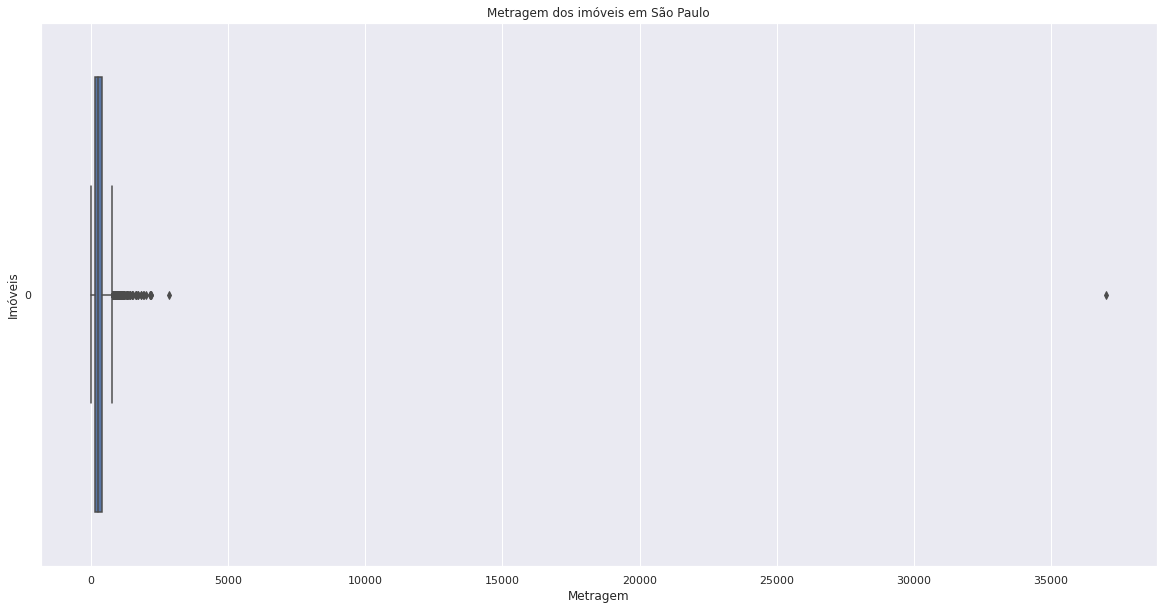

In [7]:
plt.figure(figsize=(20, 10))
bp = sns.boxplot(data=imoveis_sp['Metragem'], orient="h")
bp.set_title("Metragem dos imóveis em São Paulo")
plt.xlabel('Metragem')
plt.ylabel('Imóveis')
plt.show()

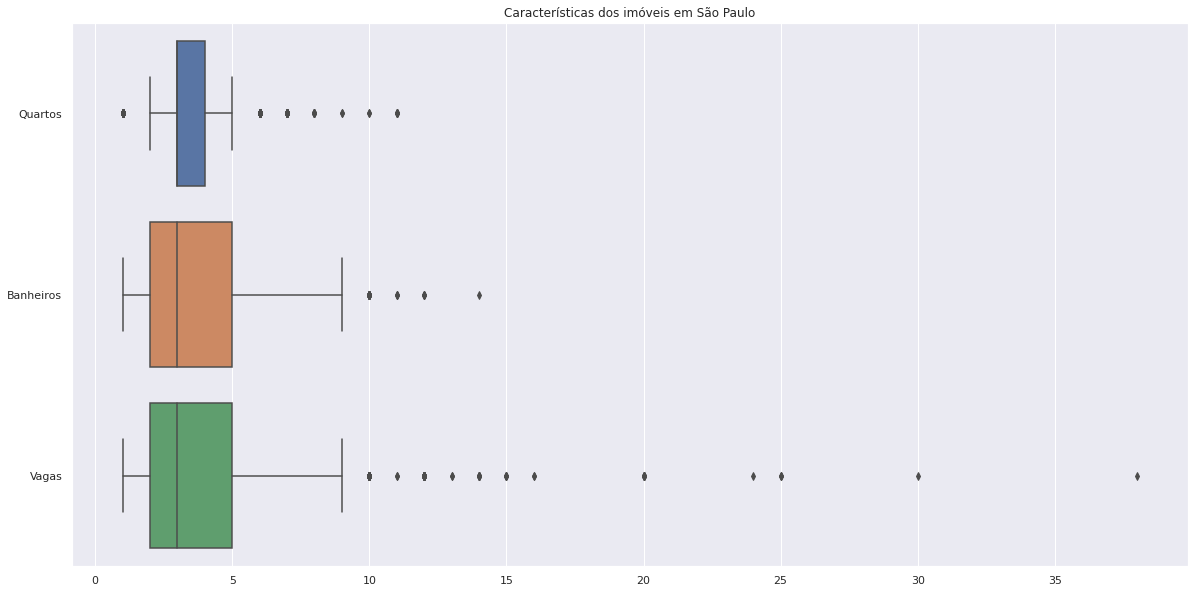

In [8]:
plt.figure(figsize=(20, 10))
bp2 = sns.boxplot(data=imoveis_sp[['Quartos', 'Banheiros', 'Vagas']], orient="h")
bp2.set_title("Características dos imóveis em São Paulo")
plt.show()

## 3. Exclusão dos outliers mais relevantes

<p>Exclusão de 42 imóveis que desviavam muito a média</p>

In [9]:
imoveis_norm = imoveis_sp.query('Metragem <= 30000 and Banheiros <= 10 and Vagas < 13')
imoveis_norm = imoveis_norm.query('Valor_anuncio > 100000 and Valor_anuncio < 30000000')
imoveis_norm

,Rua,Bairro,Cidade,cep,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,4061000.00,1000,4,8,6,7000000.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,4642020.00,496,4,4,4,3700000.00,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,4845200.00,125,4,3,2,380000.00,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,3176000.00,100,3,2,2,540000.00,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,4737030.00,440,4,4,6,1980000.00,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,4550010.00,157,3,2,2,960000.00,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,4058020.00,267,3,6,4,1500000.00,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,4671185.00,95,2,2,2,665000.00,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,4145020.00,205,3,3,6,1050000.00,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [10]:
#Salvando a base limpa para uso posterior
imoveis_norm.to_csv("dados/dados_finais_imoveis_sp", sep=";", index = False)

### Dados sem outliers relevantes

In [11]:
imoveis_norm = imoveis_norm[['Bairro', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'Valor_m2', 'V001', 'V002', 'V003', 'V007']]
imoveis_norm.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
count,5260.00,5260.00,5260.00,5260.00,5260.00,5260.00,5260.00,5260.00,5260.00,5260.00
mean,321.17,3.39,3.68,3.72,2606583.07,7576.52,193.26,574.00,3.00,6748.44
std,232.60,1.00,1.79,2.14,3024182.72,4553.26,77.74,234.19,0.39,5939.75
min,20.00,1.00,1.00,1.00,130000.00,542.64,12.00,29.00,1.61,584.26
25%,160.00,3.00,2.00,2.00,850000.00,4661.88,135.00,407.00,2.77,2844.81
50%,254.00,3.00,3.00,3.00,1600000.00,6400.00,191.00,555.00,3.02,5163.18
75%,405.00,4.00,5.00,5.00,3100000.00,9047.62,244.00,721.00,3.28,8657.85
max,2850.00,11.00,10.00,12.00,29780000.00,45000.00,781.00,2488.00,5.21,50741.20


## 4. Análises descritivas

<p>Comparando-se a média e a mediana das principais estatísticas quantitativas, nota-se que os dados não representam uma distribuição normal simétrica, havendo, portanto, deslocamentos da curva mais à esquerda ou à direita, o que varia, inclusive, conforme o bairro e outras características</p>

<p>Principais médias</p>

In [12]:
imoveis_norm.groupby(["Bairro"]).mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
Bairro,,,,,,,,,,
Aclimação,251.07,3.18,3.01,2.92,1782677.79,7606.89,250.28,671.33,2.69,4954.85
Alto da Boa Vista,393.71,4.14,5.14,4.71,2304285.71,5964.93,219.86,612.29,2.74,8387.98
Alto da Lapa,271.49,3.00,3.73,3.22,2020183.67,8076.37,202.53,589.45,2.89,4730.59
Alto da Mooca,185.67,3.75,3.00,3.83,1212916.67,6576.22,226.58,670.50,2.96,2729.71
Alto de Pinheiros,431.89,3.95,4.65,4.58,4775411.63,11120.51,160.11,531.26,3.30,11193.55
...,...,...,...,...,...,...,...,...,...,...
Vila dos Remédios,131.67,3.00,2.33,3.33,580000.00,4546.52,313.00,966.00,3.09,1850.68
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13,235.60,708.20,3.19,1216.50
Água Branca,160.22,3.00,3.11,2.00,1090888.89,7065.20,239.78,619.89,2.58,4691.88


<p>Principais medianas</p>

In [13]:
imoveis_norm.groupby(["Bairro"]).median()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
Bairro,,,,,,,,,,
Aclimação,222.50,3.00,3.00,3.00,1500000.00,7234.30,236.00,669.00,2.78,5240.02
Alto da Boa Vista,370.00,4.00,6.00,4.00,2200000.00,6285.71,198.00,473.00,2.39,4498.21
Alto da Lapa,229.00,3.00,4.00,3.00,1650000.00,7750.00,202.00,590.00,2.86,4558.96
Alto da Mooca,172.50,3.00,2.50,4.00,1222500.00,6118.49,232.00,679.00,2.95,2768.62
Alto de Pinheiros,418.00,4.00,5.00,4.00,3900000.00,10590.04,127.00,428.00,3.37,12054.04
...,...,...,...,...,...,...,...,...,...,...
Vila dos Remédios,125.00,3.00,2.00,2.00,545000.00,4954.55,307.00,958.00,3.11,1717.44
Vila Água Funda,143.00,2.00,2.00,2.00,650000.00,4111.11,307.00,916.00,2.98,1246.33
Água Branca,174.00,3.00,3.00,2.00,1210000.00,6500.00,254.00,669.00,2.63,6143.30


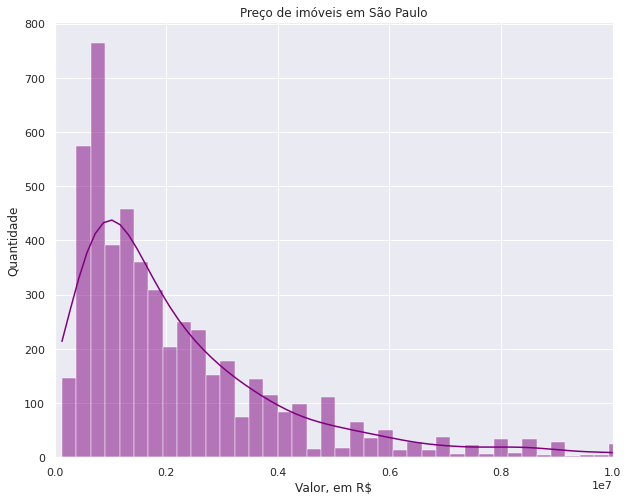

In [14]:
sns.set()
plt.figure(figsize=(10,8))
ax = sns.histplot(data=imoveis_norm, x='Valor_anuncio', kde=True, color='purple')
plt.xlim((0, 10000000))
ax.set_title("Preço de imóveis em São Paulo")
plt.xlabel('Valor, em R$')
plt.ylabel('Quantidade')
plt.show()

### Dados dos bairros com maior número de anúncios

<p>Quando observados os imóveis, agrupados por bairros, com a maior quantidade de anúncios, nota-se que há uma concentração maior de residências em regiões mais "nobres". Como anúncios não são gratuitos, é possível que a base de dados tenha um recorte social prévio, deixando as classes com menor poder aquisitivo subrepresentadas na amostra. Para uma análise mais robusta, seria necessário fazer alguma ponderação nas próximas fases do projeto.</p>

In [15]:
filtro = imoveis_norm["Bairro"].value_counts().index[:20]

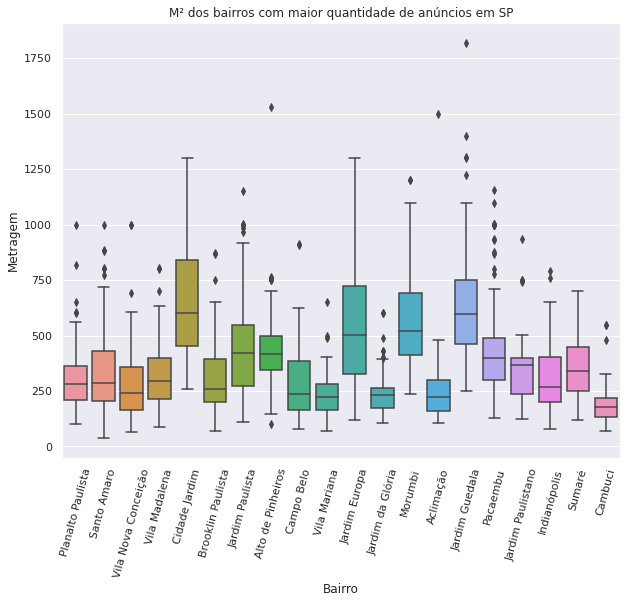

In [16]:
# Metro quadrado dos bairros que possuem mais anúncios
plt.figure(figsize=(10, 8))
bx = sns.boxplot(data=imoveis_norm.query("Bairro in @filtro"), x="Bairro", y="Metragem")
bx.tick_params(axis='x', rotation=75)
bx.set_title("M² dos bairros com maior quantidade de anúncios em SP")
plt.show()

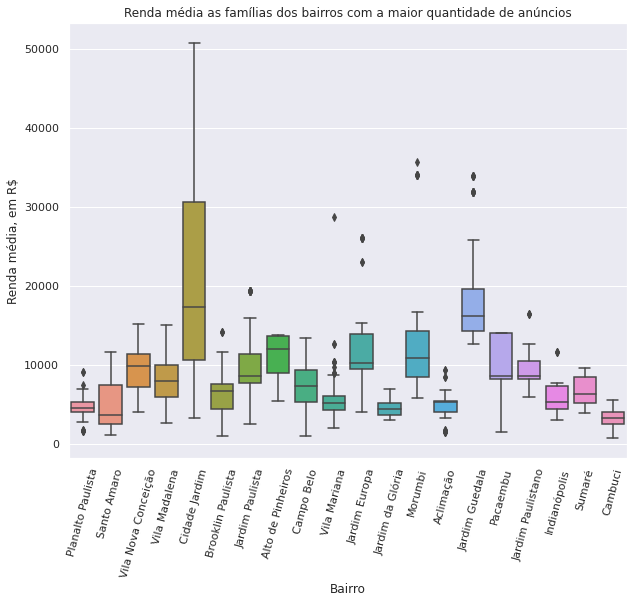

In [17]:
# Renda das famílias dos bairros com o maior número de anúncios
plt.figure(figsize=(10, 8))
bx = sns.boxplot(data=imoveis_norm.query("Bairro in @filtro"), x="Bairro", y="V007")
bx.tick_params(axis='x', rotation=75)
bx.set_title("Renda média as famílias dos bairros com a maior quantidade de anúncios")
plt.ylabel('Renda média, em R$')
plt.show()

### Onde está o m² mais caro de São Paulo e quais suas características

<p>Os imóveis que possuem o valor mais elevado do m² se concentram em regiões consideradas "nobres" da cidade de São Paulo, como Jardim Europa, Moema, Itaim Bibi e Jardim Paulistano.</p>
<p>Em termos de caraterísticas dos imóveis, contudo, percebe-se que não há grande distinção com imóveis de menor valor por m². Há uma forte influência de fatores exógenos, como status da região, que contempla uma série de questões como segurança, acesso a serviços e demais estatísticas que valem incorporar nas próximas análises.</p>
<p> Outro ponto de destaque nesse recorte está na renda nominal média dos moradores responsáveis pelo imóvel, que coincidem com as cifras mais altas da base de dados.</p>

In [18]:
m2_mais_caros = imoveis_norm.groupby(["Bairro"]).mean().sort_values(by="Valor_m2", ascending=False).reset_index()
m2_mais_caros[:10]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
0,Jardim Ampliação,22.50,3.00,2.00,2.00,800000.00,36000.00,165.00,493.00,2.99,9010.55
1,Jardim América,600.76,4.13,4.89,6.45,14819210.53,23547.52,143.21,437.66,3.09,9487.90
2,Jardim Europa,556.42,4.00,5.03,4.80,9747188.61,17291.67,161.05,426.43,2.73,12136.20
3,Vila Nova Conceição,298.15,3.00,3.51,3.08,5060092.31,17057.29,174.12,471.06,2.71,9081.19
4,Jardim Luzitânia,528.04,3.56,5.00,4.54,9102500.00,16691.99,244.96,844.40,3.42,13446.31
5,Jardim Paulista,445.44,3.61,4.50,4.28,6520500.00,14713.77,205.01,581.96,2.83,9434.42
6,Itaim Bibi,151.62,2.88,2.00,1.88,1967500.00,14276.41,201.50,505.62,2.60,8178.98
7,Jardim Paulistano,344.79,3.67,3.92,3.72,4746052.64,14188.97,162.21,442.21,2.74,9460.70
8,Moema,437.14,3.86,4.29,4.57,5285714.29,12551.42,203.86,437.14,2.16,8635.12
9,Jardim Luanda,112.50,3.00,2.00,3.00,1400000.00,12450.59,222.00,681.00,3.07,3342.94


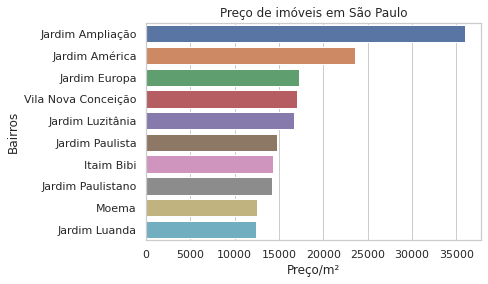

In [19]:
sns.set(style = 'whitegrid')  
bp = sns.barplot(x="Valor_m2", y="Bairro", data=m2_mais_caros.head(10))
bp.set_title("Preço de imóveis em São Paulo")
plt.xlabel('Preço/m²')
plt.ylabel('Bairros')
plt.show()

### Onde está o m² mais barato de São Paulo e quais suas características

In [20]:
m2_mais_baratos = imoveis_norm.groupby(["Bairro"]).mean().sort_values(by="Valor_m2", ascending=True).reset_index()
m2_mais_baratos[:10]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
0,Jardim Vera Cruz(Zona Leste),642.50,3.00,2.00,5.00,350000.00,544.76,219.00,750.00,3.42,1249.88
1,Jardim Vila Carrão,386.00,3.00,2.00,6.00,295000.00,764.25,258.00,879.00,3.41,1422.99
2,Vila Aurea,182.00,3.00,1.00,2.00,165000.00,906.59,252.00,840.00,3.33,989.55
3,Jardim Itapemirim,204.00,2.00,1.00,1.00,215118.00,1054.50,256.00,989.00,3.86,1351.68
4,Jardim Amália,120.00,2.00,2.00,1.00,130000.00,1083.33,318.00,1098.00,3.45,1095.02
5,Guaianazes,224.00,2.00,1.00,5.00,265000.00,1183.04,276.00,947.00,3.43,737.80
6,Parque Santa Cecília,250.00,3.00,2.00,4.00,300000.00,1200.00,262.00,963.00,3.68,998.97
7,Jardim Fernandes,300.00,3.00,2.00,1.00,400000.00,1333.33,224.00,855.00,3.82,1109.02
8,Jardim Santa Fé (Zona Sul),272.50,1.00,1.00,2.00,370000.00,1357.91,228.00,816.00,3.58,1102.39
9,Vila Castelo,2850.00,3.00,3.00,10.00,4000000.00,1403.51,298.00,924.00,3.10,1123.52


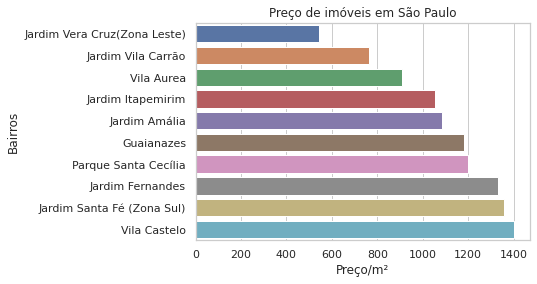

In [21]:
sns.set(style = 'whitegrid')  
bp = sns.barplot(x="Valor_m2", y="Bairro", data=m2_mais_baratos.head(10))
bp.set_title("Preço de imóveis em São Paulo")
plt.xlabel('Preço/m²')
plt.ylabel('Bairros')
plt.show()

### Onde moram as pessoas mais ricas de São Paulo

In [22]:
mais_ricos_imoveis = imoveis_norm.groupby(["Bairro"]).mean().sort_values(by="V007", ascending=False).reset_index()
mais_ricos_imoveis[:10]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
0,Vila Andrade,146.33,3.00,3.67,2.33,913666.67,6275.58,27.00,80.00,2.96,33574.62
1,Jardim Sílvia (Zona Oeste),1218.00,4.33,5.57,7.62,5559047.62,5304.86,66.29,237.57,3.61,32373.54
2,Chácara Flora,1167.40,5.20,6.20,8.40,9600000.00,8679.60,197.00,704.00,3.57,31566.57
3,Paineiras do Morumbi,673.79,4.00,4.43,6.86,5121428.57,7619.63,77.00,254.00,3.30,24275.14
4,Cidade Jardim,651.31,4.14,5.33,5.90,5500010.34,8400.82,77.30,261.45,3.41,20331.43
5,Jardim Guedala,632.41,4.12,5.64,6.01,5193272.39,8164.66,99.12,342.64,3.50,18339.76
6,Jardim Panorama,506.64,3.82,5.18,4.36,4430000.00,8605.39,137.45,413.09,3.01,16969.45
7,Vila Morumbi,476.60,3.87,4.60,4.27,3813333.33,7069.56,86.27,290.73,3.44,16413.35
8,Jardim Everest,733.63,4.63,6.32,7.47,5314210.53,7366.29,76.53,273.95,3.60,15610.42
9,Cidade Ademar,100.00,2.00,1.00,6.00,470000.00,4700.00,277.00,778.00,2.81,14798.53


### Onde moram as pessoas com menor poder aquisitivo

In [23]:
mais_pobres_imoveis = imoveis_norm.groupby(["Bairro"]).mean().sort_values(by="V007", ascending=True).reset_index()
mais_pobres_imoveis[:10]

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,V001,V002,V003,V007
0,Guaianazes,224.00,2.00,1.00,5.00,265000.00,1183.04,276.00,947.00,3.43,737.80
1,Jardim Lourdes,200.00,3.00,1.00,2.00,400000.00,2000.00,117.00,419.00,3.58,846.54
2,Piqueri,224.00,3.00,4.00,4.00,725000.00,3236.61,373.00,1269.00,3.40,883.67
3,Jardim Ipanema (Zona Oeste),710.00,5.00,3.00,6.00,1340000.00,1887.32,417.00,1424.00,3.41,930.69
4,Vila Jurema,85.00,3.00,2.00,3.00,600000.00,7058.82,187.00,699.00,3.74,948.28
5,Jardim Santo Antônio,250.00,4.00,4.00,4.00,650000.00,2600.00,281.00,1009.00,3.59,963.73
6,Vila Aurea,182.00,3.00,1.00,2.00,165000.00,906.59,252.00,840.00,3.33,989.55
7,Vila Minerva,170.00,3.00,2.00,2.00,325000.00,1911.76,141.00,473.00,3.35,992.97
8,Parque Santa Cecília,250.00,3.00,2.00,4.00,300000.00,1200.00,262.00,963.00,3.68,998.97
9,Jardim do Campo,120.00,3.00,2.00,2.00,380000.00,3166.67,146.00,499.00,3.42,1001.42


## 5) Modelo preditivo de valor de imóvel em SP

<p>Após uma série de testes pela equipe do projeto, foi definido um modelo preliminar de predição do valor dos imóveis</p>

In [24]:
#importanto base de dados limpa
imoveis_sp = pd.read_csv("dados/dados_finais_imoveis_sp", sep=";")
imoveis_sp

,Rua,Bairro,Cidade,cep,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,4061000.00,1000,4,8,6,7000000.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,4642020.00,496,4,4,4,3700000.00,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,4845200.00,125,4,3,2,380000.00,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,3176000.00,100,3,2,2,540000.00,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,4737030.00,440,4,4,6,1980000.00,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5255,Rua Pedro Teixeira,Vila Olímpia,São Paulo,4550010.00,157,3,2,2,960000.00,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5256,Avenida Odila,Planalto Paulista,São Paulo,4058020.00,267,3,6,4,1500000.00,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5257,Rua Tapuçu,Vila Sofia,São Paulo,4671185.00,95,2,2,2,665000.00,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5258,Rua Estero Belaco,Vila da Saúde,São Paulo,4145020.00,205,3,3,6,1050000.00,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


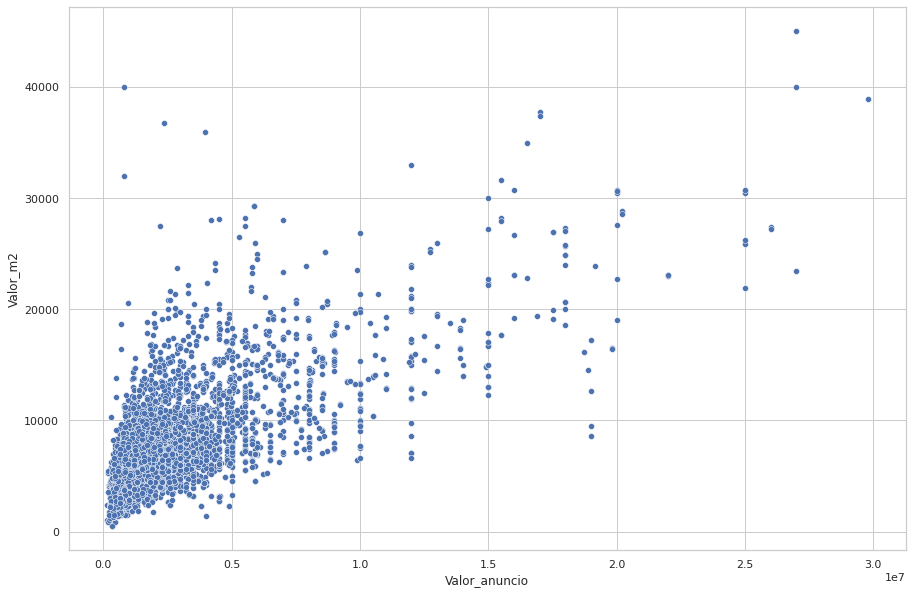

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=imoveis_sp, x="Valor_anuncio", y="Valor_m2")
plt.show()

### Correlação entre as variáveis

<p>É por meio da correlação entre as variáveis que se torna possível definir de maneira assertiva quais fatores interferem mais fortemente no preço do imóvel, ou seja, o que mais impacta a variável que buscamos encontrar no modelo.</p>

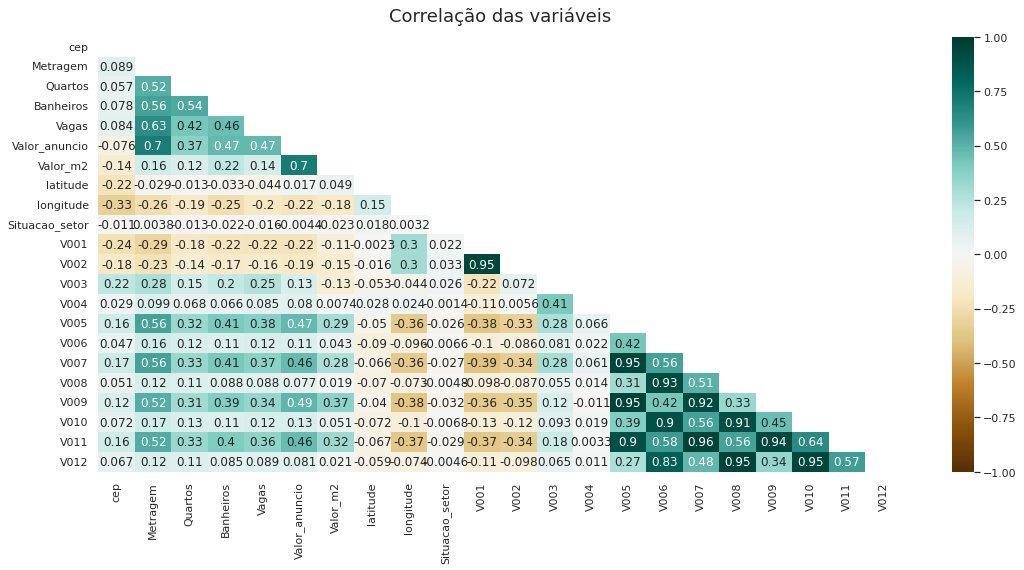

In [26]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(imoveis_sp.corr(), dtype=bool))
heatmap = sns.heatmap(imoveis_sp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação das variáveis', fontdict={'fontsize':18}, pad=16);

### Regressão Linear

<p>Quanto mais próximo de 1 o score de R-Squared estiver, maior o fit do modelo.</p>
<p>O modelo estudado pela regressão linear atingiu um fit de 53%, quando utilizadas as variáveis que possuem a maior correlação com o Valor do Anúncio.Seria necessário utilizar outro tipo de regressão para atingir um fit melhor, que será estudado na próxima fase do projeto.</p>

In [28]:
X = imoveis_sp[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'latitude', 'longitude', 
                'V001', 'V002', 'V003', 'V005', 'V007', 'V009', 'V011']]
Y = imoveis_sp["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [29]:
print(f'Mean Absolute Error: teste: {mae_test}; treino: {mae_train}')

Mean Absolute Error: teste: 969550.6782654481; treino: 1173112.521663081


In [30]:
print(f'R-Squared: teste: {r2_test}; treino:{r2_train}')

R-Squared: teste: 0.5767411826970665; treino:0.5329033819134459
